In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/bank.csv')
data.shape

(11162, 17)

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# mapping for month
maps = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
data['month'] = data['month'].map(maps)

In [5]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for cols in data:
  if data[cols].dtype == 'O':
    data[cols] = encoder.fit_transform(data[cols])

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1


In [12]:
# splitting the data
x = data.drop('deposit',axis = 1)
y = data['deposit']

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

Training Accuracy:  100.0 %
Testing Accuracy:  78.11 %

Classification Report:

                precision    recall  f1-score   support

           0       0.78      0.81      0.79      1742
           1       0.78      0.75      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



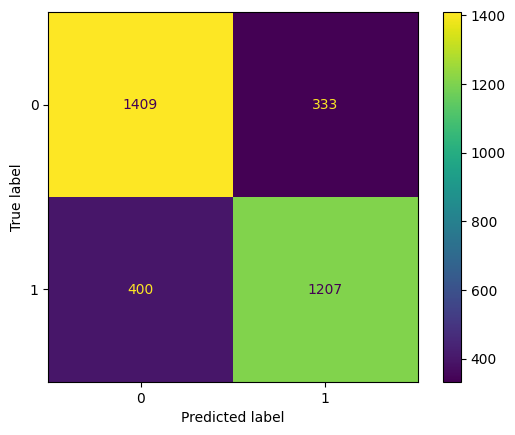

In [17]:
# Decision tree algo
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)
training_score = model.score(x_train_scaled, y_train)
print("Training Accuracy: ", round(training_score*100,2),'%')

y_pred = model.predict(x_test_scaled)

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Testing Accuracy: ', round(accuracy_score(y_test, y_pred)*100,2),'%')
print('\nClassification Report:\n\n ', classification_report(y_test,y_pred))


In [22]:
# AdaBoost
# estimator
tree_clf = DecisionTreeClassifier(criterion = 'entropy',random_state = 42, max_depth = 1)

adaboost_model = AdaBoostClassifier(estimator = tree_clf, n_estimators = 100)
adaboost_model.fit(x_train_scaled, y_train)
print('Training Score: ',round(adaboost_model.score(x_train_scaled, y_train)*100,2),'%')


Training Score:  81.2 %


Testing Accuracy:  80.62 %


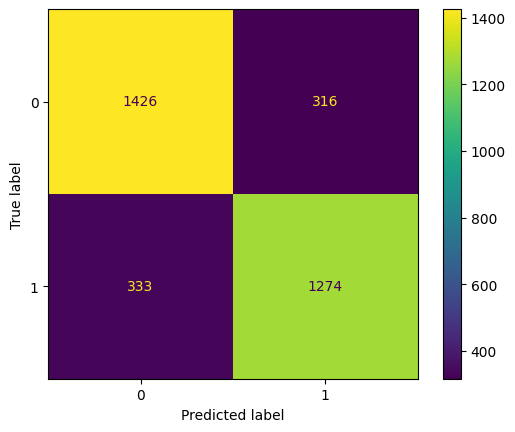

In [23]:
y_pred = adaboost_model.predict(x_test_scaled)
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Testing Accuracy: ', round(accuracy_score(y_test,y_pred)*100,2),'%')
